<a href="https://colab.research.google.com/github/yuji-sgs/web-optimization/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-916-8.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『ウェブ最適化ではじめる機械学習』（飯塚 修平　著）](https://www.oreilly.co.jp/books/9784873119168/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

# 4章: メタヒューリスティクス: 統計モデルを使わない最適化手法

In [2]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')

<ipython-input-2-617811aff667>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 山登り法

In [4]:
def is_valid(x):
  """実行可能解であることを確認する。"""
  return all(-1 < i < size for i in list(x))

class HillClimbing:
  """山登り法

  Args:
    init_x: 初期解
    init_f: 初期解の評価値

  Attributes:
    current_x: 現状解
    current_f: 現状解の評価値
  """

  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f

  def get_neighbors(self):
    """近傍解を出力する。

    Returns:
      近傍解のリスト
    """
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))

      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def update(self, neighbor_xs, neighbor_fs):
    """良い近傍解があれば現状解を更新する。

    Args:
      neighbor_xs: 評価済みの近傍解のリスト
      neighbor_fs: 近傍解の評価値のリスト

    Returns:
      更新前の現状解と更新後の現状解のタプル
    """
    old_x = self.current_x
    if max(neighbor_fs) > self.current_f:
      self.current_x = neighbor_xs[
          neighbor_fs.index(max(neighbor_fs))]
      self.current_f = max(neighbor_fs)
    return (old_x, self.current_x)

In [5]:
init_x = (0, 0)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)

  print('%s -> %s' % (step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)

(0, 0) -> (0, 1)
(0, 1) -> (0, 2)
(0, 2) -> (0, 3)
(0, 3) -> (0, 4)
(0, 4) -> (0, 4)
(0, 4) -> (0, 4)


In [6]:
import matplotlib.ticker as ticker

def visualize_path(evaluated_xs, steps):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim(-.5, size -.5)
  ax.set_ylim(-.5, size -.5)

  for i in range(size):
    for j in range(size):
      if (i, j) in evaluated_xs:
        ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center',
                bbox=dict(edgecolor='gray', facecolor='none',
                          linewidth=2))
      else:
        ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center')

  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.xaxis.set_minor_locator(
      ticker.FixedLocator(np.arange(-.5, size - .5, 1)))
  ax.yaxis.set_minor_locator(
      ticker.FixedLocator(np.arange(-.5, size - .5, 1)))

  plt.tick_params(axis='both', which='both', bottom='off', top='off',
                  left='off', right='off', labelbottom='off',
                  labelleft='off')
  ax.grid(True, which='minor')
  ax.grid(False, which='major')

  for step in steps:
    ax.annotate('', xy=step[1], xytext=step[0],
                arrowprops=dict(shrink=0.2, width=2, lw=0))

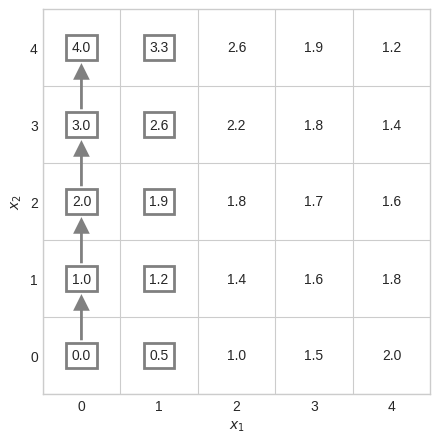

In [8]:
# (0,0)  を初期解としたときの山登り法による探索の履歴
visualize_path(evaluated_xs, steps)

(4, 2) -> (4, 1)
(4, 1) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)


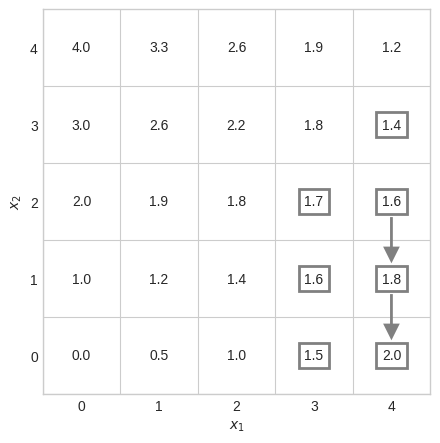

In [10]:
# (4,2)  を初期解としたときの山登り法による探索の履歴
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)

  print('%s -> %s' % (step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)

visualize_path(evaluated_xs, steps)